# **Анализ продаж  в магазинах велосипедов**


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## **Импорт данных из .csv файла и ознакомление:**

In [17]:
sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [18]:
sales.shape

(113036, 18)

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [20]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


## **Анализ численных переменных и визуализация**

Рассмотрим колонку Unit_cost 

In [21]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [22]:
sales['Unit_Cost'].mean()

267.296365759581

на mean() сильное воздействие оказывают выбросы

In [23]:
sales['Unit_Cost'].median()


9.0

<AxesSubplot:>

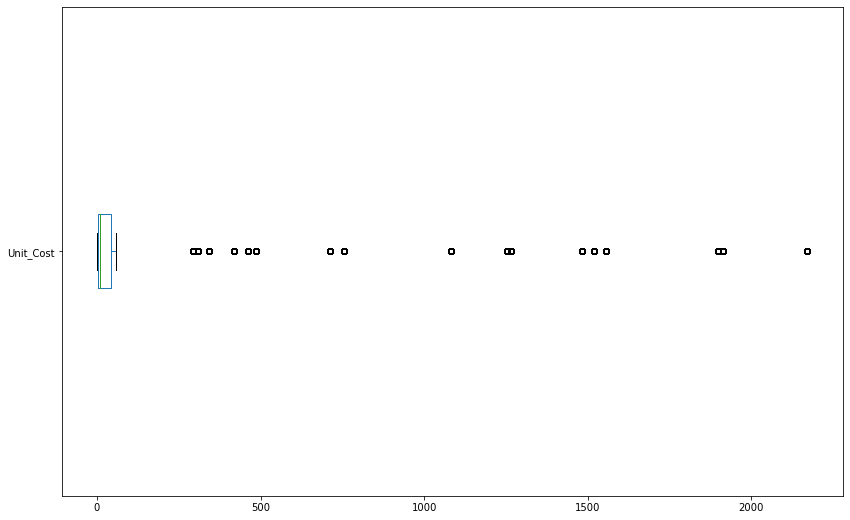

In [24]:
sales['Unit_Cost'].plot(kind='box',vert=False,figsize=(14,9))

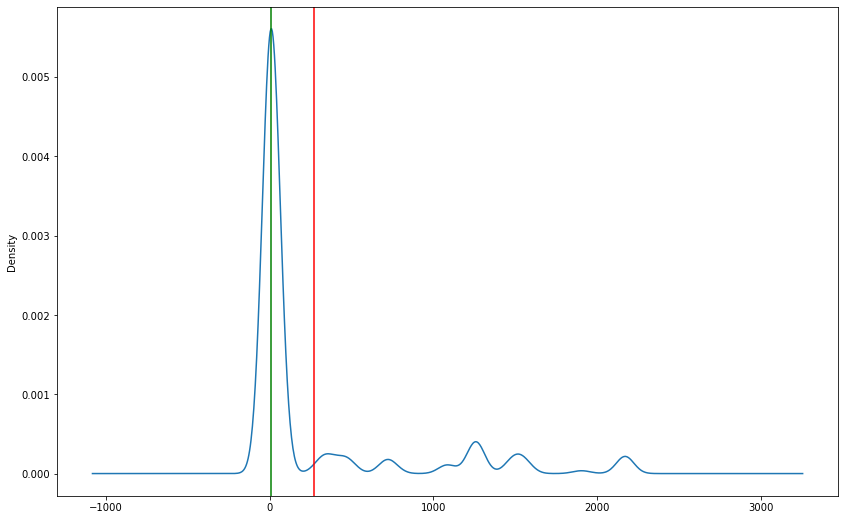

In [25]:
ax=sales['Unit_Cost'].plot(kind='density',figsize=(14,9))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')


Text(0.5, 0, 'dollars')

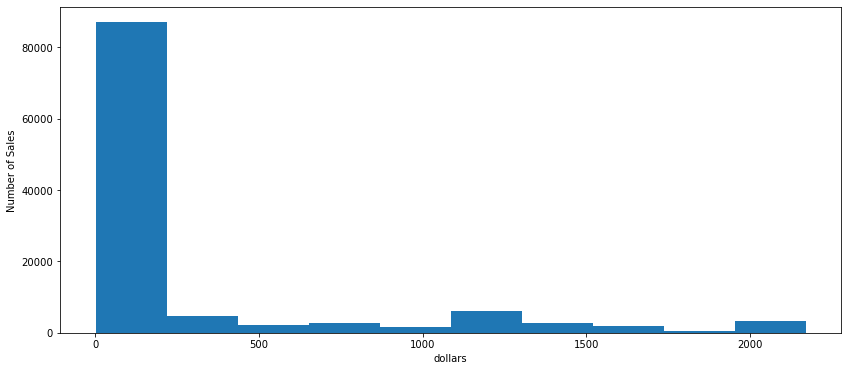

In [26]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14, 6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')


75% товаров имеют себестоимость менее 42 долларов

Рассмотрим переменную Customer_Age

In [49]:
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot:ylabel='Density'>

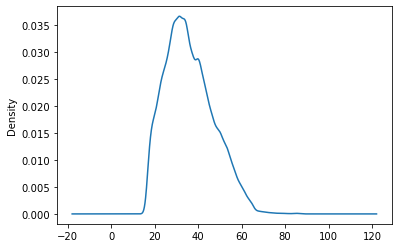

In [50]:
sales['Customer_Age'].plot(kind='kde')

<AxesSubplot:>

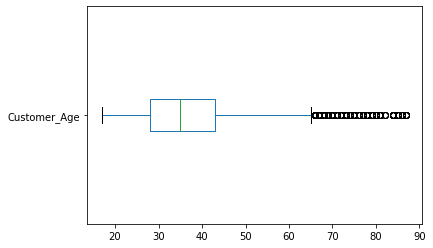

In [52]:
sales['Customer_Age'].plot(kind='box',vert=False)

Средний возраст покупателя 35 лет, 75% покупателей имеют возраст менее 45 лет

Рассмотрим переменную Order_Quantity

In [53]:
sales['Order_Quantity'].mean()

11.901659648253654

<AxesSubplot:ylabel='Frequency'>

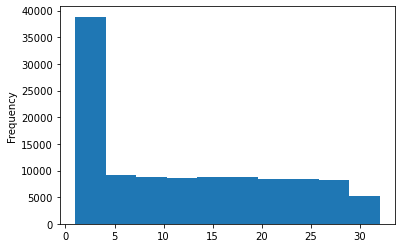

In [54]:
sales['Order_Quantity'].plot(kind='hist')

<AxesSubplot:>

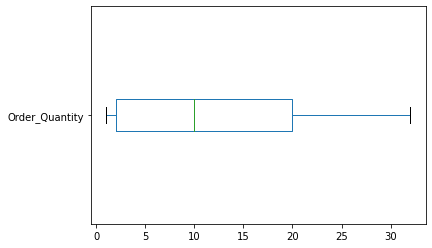

In [55]:
sales['Order_Quantity'].plot(kind='box',vert=False)


## **Анализ категориальных переменных и визуализация**

Рассмотрим переменную Age_Group

In [27]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

Есть 4 группы  покупателей в зависимости от возраста

<AxesSubplot:>

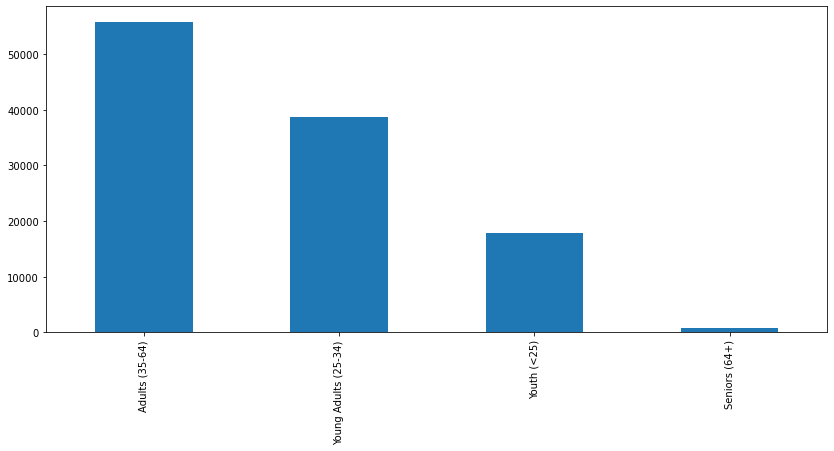

In [28]:
sales['Age_Group'].value_counts().plot(kind='bar',figsize=(14,6))


Группа Adults(35-64) частые покупатели в магазине велосипедов

Сколько продаж в каждый год


In [56]:
sales['Year'].value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:ylabel='Year'>

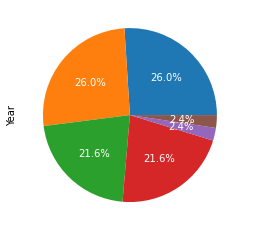

In [62]:
sales['Year'].value_counts().plot(kind='pie', textprops={
    'color': "w"}, autopct='%1.1f%%')


Сколько продаж в каждый месяц

In [63]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot:>

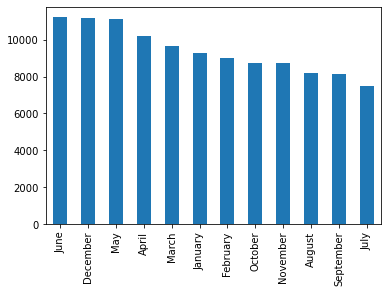

In [64]:
sales['Month'].value_counts().plot(kind='bar')

У какой страны больше всего продаж

In [65]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<AxesSubplot:>

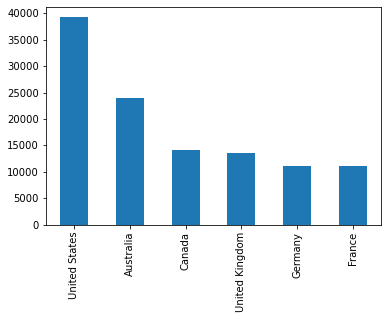

In [66]:
sales['Country'].value_counts().plot(kind='bar')

Проданные товары

In [67]:
sales['Product'].unique().tolist()

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 'AWC Logo Cap',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Red',
 'Sport-100 Helmet, Blue',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42

10 наиболее продаваемых товаров

In [68]:
sales['Product'].value_counts().head(10)

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: Product, dtype: int64

<AxesSubplot:>

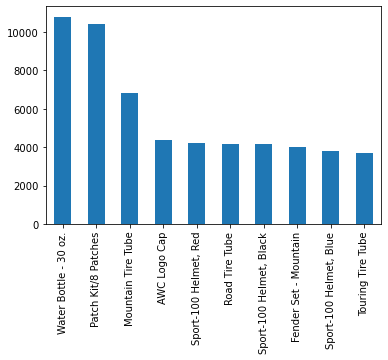

In [69]:
sales['Product'].value_counts().head(10).plot(kind='bar')

## **Зависимости между признаками**

In [29]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x49176a7fd0>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

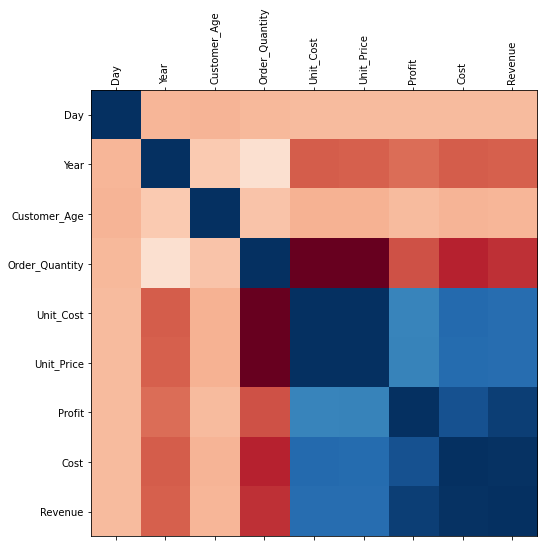

In [30]:
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)


<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

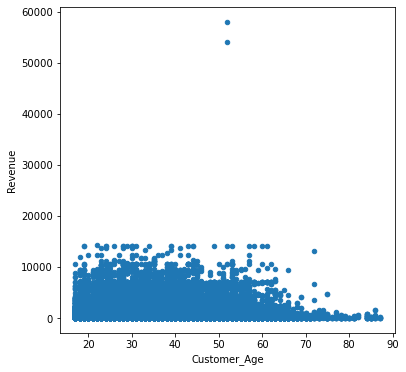

In [31]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6, 6))


<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

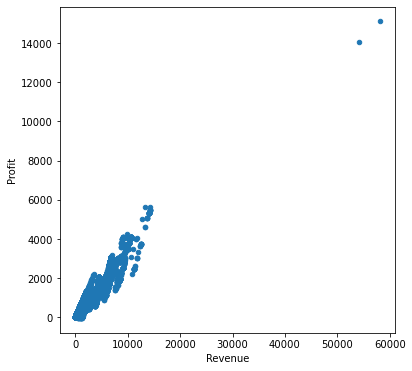

In [32]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

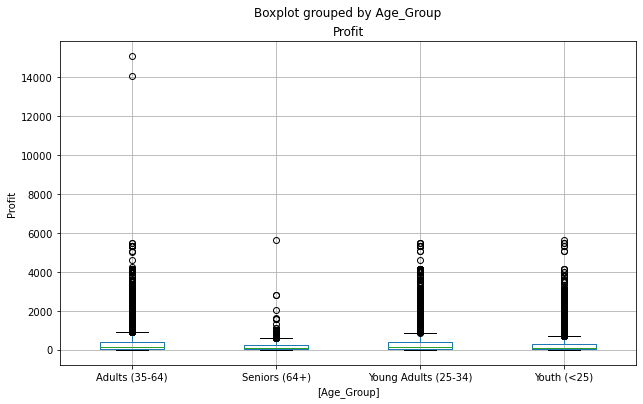

In [33]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10, 6))
ax.set_ylabel('Profit')


Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

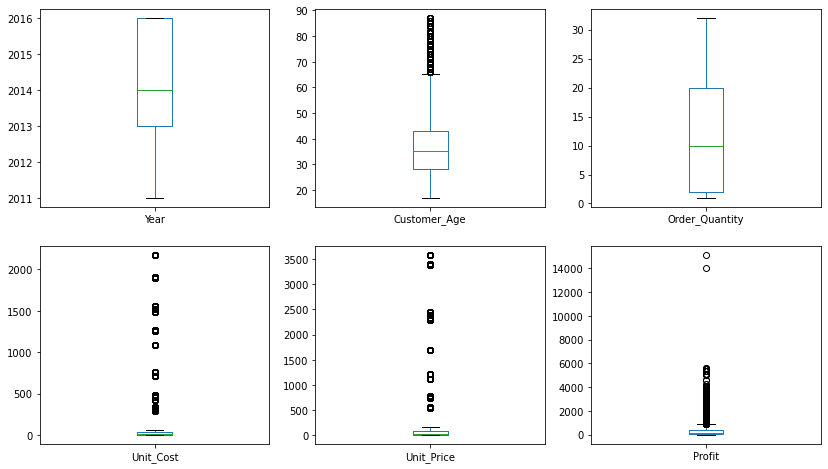

In [34]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))



Зависимость переменных Unit_Cost и Unit_Price

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

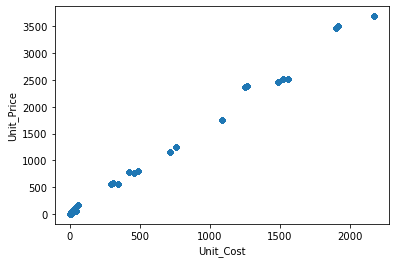

In [70]:
sales.plot(kind='scatter',x='Unit_Cost',y='Unit_Price')

Зависимость между Order_Quantity и Profit

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

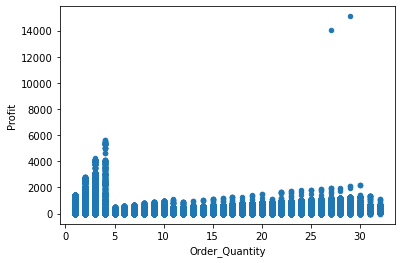

In [71]:
sales.plot(kind='scatter',x='Order_Quantity',y='Profit')

Зависимость между Profit и Country

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

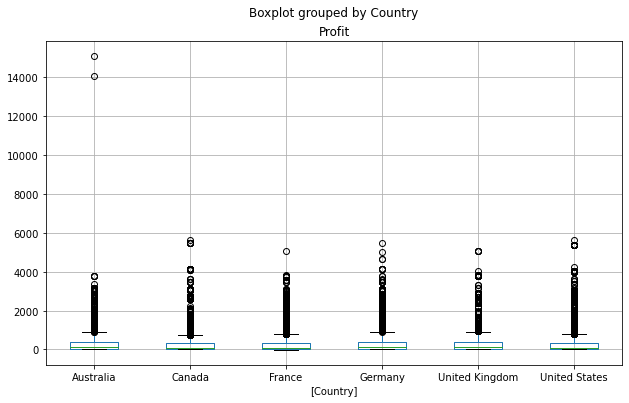

In [72]:
sales[['Profit', 'Country']].boxplot(by='Country',figsize=(10,6))

Зависимость между Customer_Age и Country

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

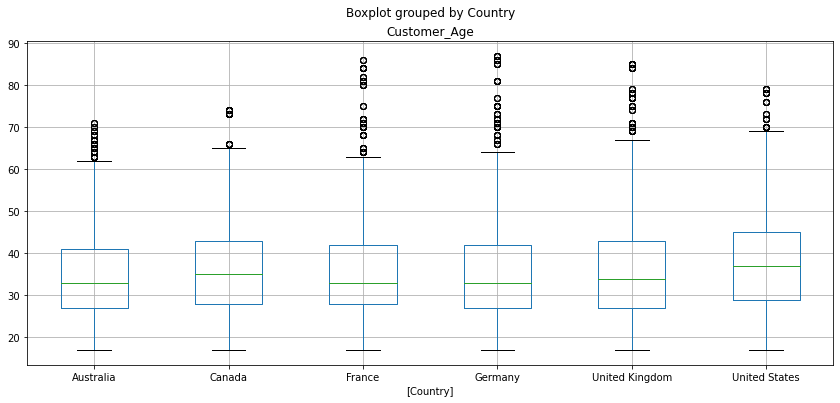

In [74]:
sales[['Customer_Age','Country']].boxplot(by='Country',figsize=(14,6))

## **Создание новых переменных или изменение существующих**


In [35]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()


0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

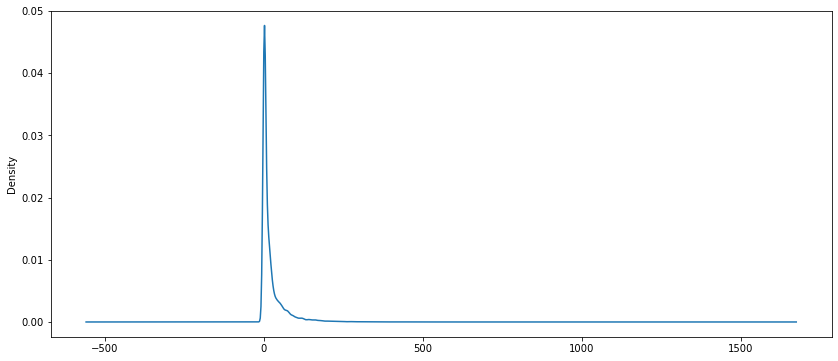

In [36]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

Добавим новую переменную Calculated_Cost=Unit_Cost*Order_Quantity

In [37]:
sales['Calculated_Cost']=sales['Unit_Cost']*sales['Order_Quantity']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

Зависимость между Calculated_Cost и Profit

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

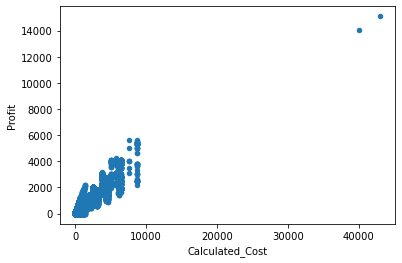

In [38]:
sales.plot(kind='scatter',x='Calculated_Cost',y='Profit')

Добавим новую переменную Calculated_Revenue=Cost+Profit

In [39]:
sales['Calculated_Revenue']=sales['Cost']+sales['Profit']
sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

<AxesSubplot:ylabel='Frequency'>

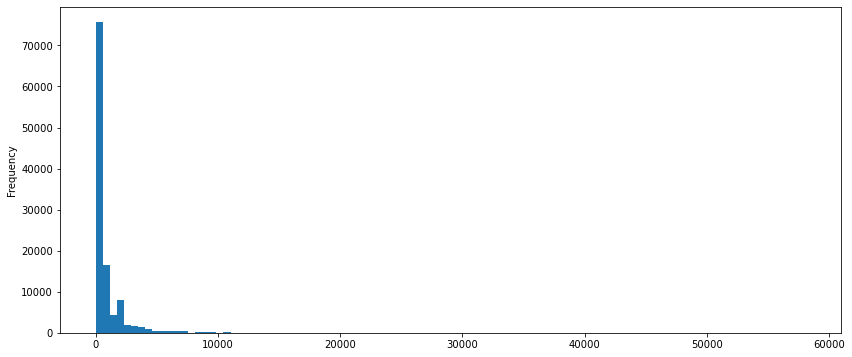

In [40]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

Изменим переменную Unit_Price, добавим налог 3%

In [41]:
sales['Unit_Price']*=1.03
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

Добавим новую переменную Calculated_Date(YYYY-MM-DD), используя Year, Month, Day

In [75]:
sales['Calculated_Date']=sales[['Year','Month','Day']].apply(lambda x:'{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [76]:
sales['Calculated_Date']=pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()


0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

Как изменяются продажи во времени

<AxesSubplot:>

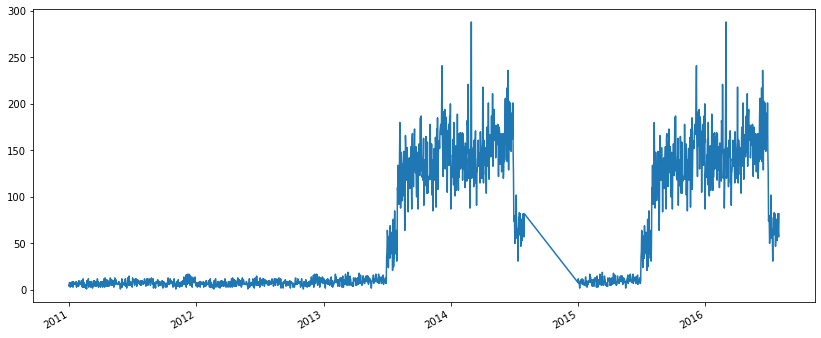

In [78]:
sales['Calculated_Date'].value_counts().plot(kind='line',figsize=(14,6))


Увеличить доход от каждой покупки на 50

In [79]:
sales['Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Revenue, dtype: int64

In [82]:
sales['Revenue']+=50
sales['Revenue'].head()


0    1000
1    1000
2    2451
3    2138
4     468
Name: Revenue, dtype: int64

## **Выбор необходимых данных**

Выбрать все продажи в штате Kentucky

In [42]:
cond=sales['State']=='Kentucky'
sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


Получить среднее значение дохода в группе Adults(35-64)

In [43]:
cond = sales['Age_Group'] =='Adults (35-64)'
sales.loc[cond,'Revenue'].mean()

762.8287654055604

Сколько покупок у групп Adults (35-64) и Youth (<25)

In [44]:
cond=(sales['Age_Group']=='Adults (35-64)')|(sales['Age_Group']=='Youth (<25)')
sales.loc[cond].shape[0]

73652

Среднее значение дохода группы Adults (35-64) в United States

In [45]:
cond=(sales['Age_Group']=='Adults (35-64)')&(sales['Country']=='United States')
sales.loc[cond,'Revenue'].mean()

726.7260473588342

Увеличить доход от каждой покупки во Франции на 10%

In [48]:
cond=sales['Country']=='France'
sales.loc[cond,'Revenue']*1.1

50         865.7
51         865.7
52        3252.7
53        3136.1
60         688.6
           ...  
112979    1892.0
113000     405.9
113001     473.0
113034    1386.0
113035    1327.7
Name: Revenue, Length: 10998, dtype: float64

Сколько всего заказов было во Франции и Канаде

In [84]:
cond=(sales['Country']=='Canada')|(sales['Country']=='France')
sales.loc[cond].shape[0]

25176

Сколько заказов Bike Racks было в Канаде 

In [85]:
cond=(sales['Country']=='Canada')&(sales['Sub_Category']=='Bike Racks')
sales.loc[cond].shape[0]

104

Сколько заказов было в каждом регионе Франции

In [88]:
france_states=sales[sales['Country']=='France']['State'].value_counts()

<AxesSubplot:>

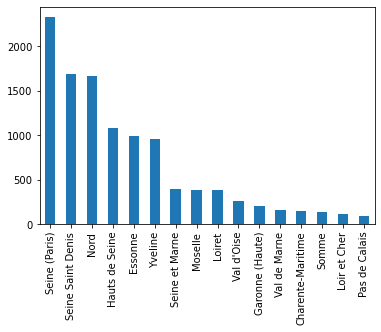

In [89]:
france_states.plot(kind='bar')

Сколько продаж в каждой категории


In [90]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

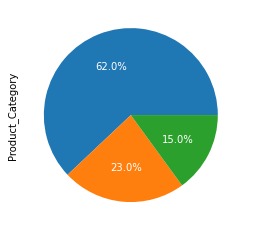

In [92]:
sales['Product_Category'].value_counts().plot(kind='pie', textprops={
    'color': "w"}, autopct='%1.1f%%')


Сколько продаж в каждой подкатегории категории Аксессуары

In [94]:
accessories=sales.loc[sales['Product_Category'] ==
                     'Accessories', 'Sub_Category'].value_counts()
accessories


Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<AxesSubplot:>

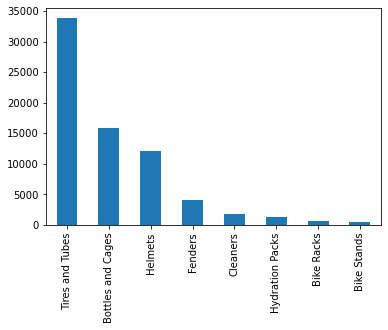

In [95]:
accessories.plot(kind='bar')

Сколько продаж в каждой подкатегории категории Велосипеды

In [96]:
bikes = sales.loc[sales['Product_Category'] ==
                        'Bikes', 'Sub_Category'].value_counts()
bikes


Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot:ylabel='Sub_Category'>

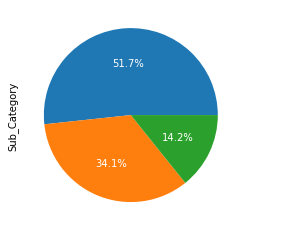

In [97]:
bikes.plot(kind='pie', textprops={
    'color': "w"}, autopct='%1.1f%%')


Кто больше покупает мужчины или женщины?

In [98]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot:>

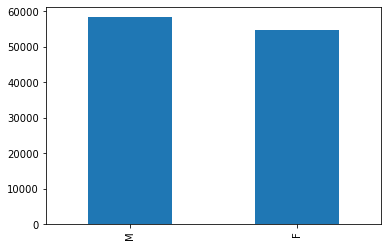

In [99]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

Сколько покупок на более чем 500 совершили мужчины

In [100]:
sales.loc[(sales['Revenue']>500)&(sales['Customer_Gender']=='M')].shape[0]

23342

5 самых крупных покупок

In [101]:
sales.sort_values(['Revenue'], ascending=False).head(5)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124,1116.807692,42978,58074,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,...,27,1482,2455.52,14055,40014,54119,1039.788462,40014,54069,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,...,4,2171,3685.34,5628,8684,14362,650.545455,8684,14312,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,...,4,2171,3685.34,5485,8684,14219,322.022727,8684,14169,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,...,4,2171,3685.34,5485,8684,14219,745.736842,8684,14169,2011-09-30


Самая дорогая покупка

In [102]:
sales[sales['Revenue']==sales['Revenue'].max()]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,...,29,1482,2455.52,15096,42978,58124,1116.807692,42978,58074,2015-07-24


Среднее число товаров в покупке на более чем 10000

In [103]:
cond=sales['Revenue']>10000
sales.loc[cond,'Order_Quantity'].mean()

3.689265536723164

Среднее число товаров в покупке на менее чем 10000

In [104]:
cond=sales['Revenue']<10000
sales.loc[cond,'Order_Quantity'].mean()

11.914539380997528

Сколько продаж было в Мае 2016

In [105]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[cond].shape[0]


5015

Сколько продаж было в период с Мая по Июль 2016

In [106]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]


12164

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

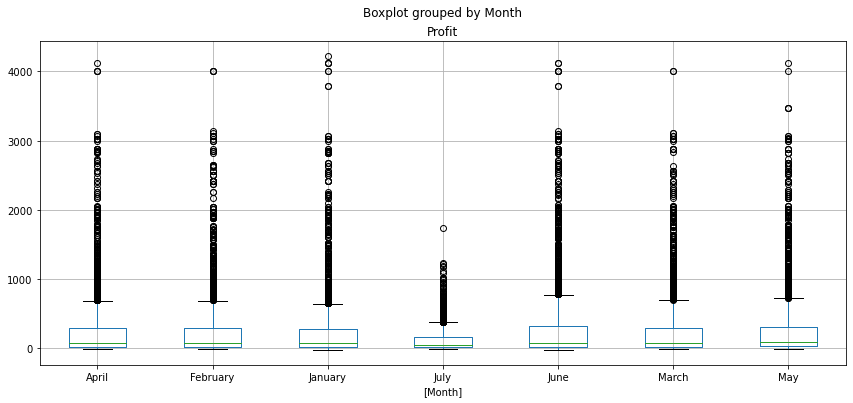

In [107]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14, 6))


Добавить налог 7.2% в каждую Unit_Price в США

In [108]:
sales.loc[sales['Country']=='United States','Unit_Price']*=1.072